Autoencoder training

In [1]:
import sys
import os

# Add project root to Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print("Project root added to sys.path:", project_root)




Project root added to sys.path: c:\Users\marya\Downloads\CI_proj


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

from lib.layers import Dense
from lib.activations import ReLU, Sigmoid
from lib.network import Network
from lib.losses import mse_loss
from lib.optimizer import SGD


In [3]:
# Load MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize to [0,1] and flatten
X_train = X_train.reshape(-1, 28*28) / 255.0
X_test = X_test.reshape(-1, 28*28) / 255.0

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (60000, 784)
Test shape: (10000, 784)


In [4]:
input_dim = 28*28
latent_dim = 64  # small latent space

encoder_layers = [
    Dense(input_dim, 128),
    ReLU(),
    Dense(128, latent_dim),
    ReLU()
]

decoder_layers = [
    Dense(latent_dim, 128),
    ReLU(),
    Dense(128, input_dim),
    Sigmoid()  # output in [0,1]
]

autoencoder_layers = encoder_layers + decoder_layers

autoencoder = Network(autoencoder_layers, optimizer=SGD(lr=0.05))


In [5]:
epochs = 50
batch_size = 128
loss_history = []

for epoch in range(epochs):
    perm = np.random.permutation(X_train.shape[0])
    X_train_shuffled = X_train[perm]
    
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train_shuffled[i:i+batch_size]
        y_batch = X_batch  # unsupervised
        
        y_pred = autoencoder.forward(X_batch)
        loss, grad = mse_loss(y_batch, y_pred)
        autoencoder.backward(grad)
        autoencoder.optimizer.step(autoencoder.params())
    
    # Compute full epoch loss
    y_pred_full = autoencoder.forward(X_train)
    epoch_loss, _ = mse_loss(X_train, y_pred_full)
    loss_history.append(epoch_loss)
    print(f"Epoch {epoch+1}/{epochs} - Loss: {epoch_loss}")


Epoch 1/50 - Loss: 25.150173448864923
Epoch 2/50 - Loss: 16.61563325823313
Epoch 3/50 - Loss: 13.452660653592222
Epoch 4/50 - Loss: 12.357651267273999
Epoch 5/50 - Loss: 10.254731683640667
Epoch 6/50 - Loss: 10.437428502712756
Epoch 7/50 - Loss: 9.750856793347564
Epoch 8/50 - Loss: 10.456438004763477
Epoch 9/50 - Loss: 8.620008881365504
Epoch 10/50 - Loss: 9.647499774597073
Epoch 11/50 - Loss: 8.98630205175503
Epoch 12/50 - Loss: 9.67929507695267
Epoch 13/50 - Loss: 8.63474098740082
Epoch 14/50 - Loss: 8.126699442874942
Epoch 15/50 - Loss: 7.762064387684999
Epoch 16/50 - Loss: 7.317251877144834
Epoch 17/50 - Loss: 7.363712437290512
Epoch 18/50 - Loss: 8.366159259994086
Epoch 19/50 - Loss: 7.180100906578635
Epoch 20/50 - Loss: 7.466984591233229
Epoch 21/50 - Loss: 7.315230476979756
Epoch 22/50 - Loss: 7.544838455877351
Epoch 23/50 - Loss: 7.614010747307819
Epoch 24/50 - Loss: 6.439746918087882
Epoch 25/50 - Loss: 6.759136713523685
Epoch 26/50 - Loss: 6.646330514912919
Epoch 27/50 - Loss

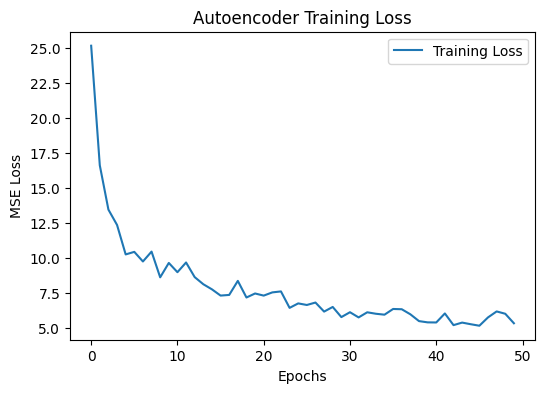

In [6]:
plt.figure(figsize=(6,4))
plt.plot(loss_history, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Autoencoder Training Loss")
plt.legend()
plt.show()


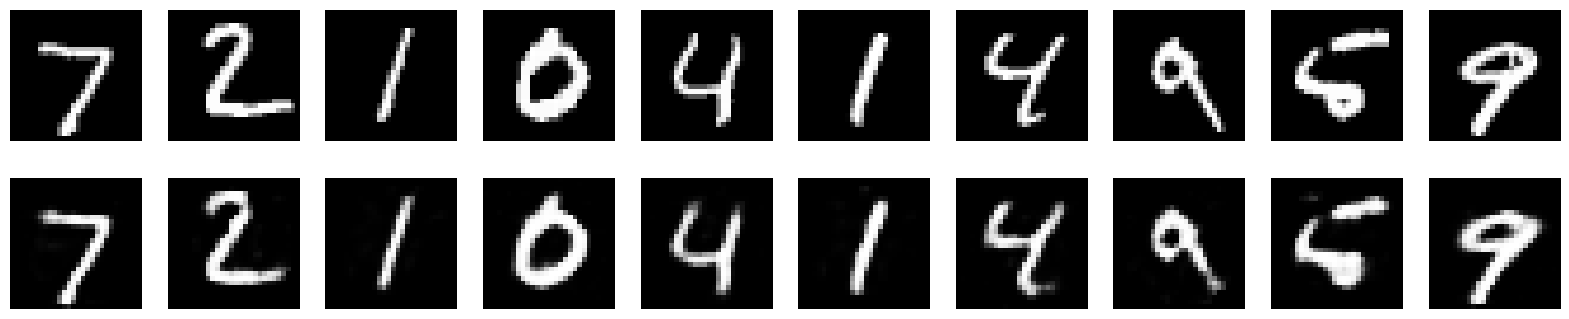

In [7]:
n = 10
X_sample = X_test[:n]
reconstructions = autoencoder.forward(X_sample)

plt.figure(figsize=(20,4))
for i in range(n):
    # Original
    plt.subplot(2, n, i+1)
    plt.imshow(X_sample[i].reshape(28,28), cmap='gray')
    plt.axis('off')
    
    # Reconstructed
    plt.subplot(2, n, i+n+1)
    plt.imshow(reconstructions[i].reshape(28,28), cmap='gray')
    plt.axis('off')
plt.show()
